<a href="https://colab.research.google.com/github/Anshu998/AI-ML-Workshop_2330772_AnshuSinghThakuri/blob/master/2330772_Anshu_Singh_Thakuri_Image%20Classification%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import random
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
# Change the import statement below
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator from tensorflow.keras

In [ ]:


# Define the base path
base_path = '/content/drive/MyDrive/6CS012-final/dataset/Training'


subdirs = [
    'glioma_tumor',
    'meningioma_tumor',
    'no_tumor',
    'pituitary_tumor'
]



In [ ]:
import os
import numpy as np
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array

# Define the target image size
image_size = (80, 80)

# Initialize lists to store image data, class labels, class names, and corrupted images
image_data = []
class_labels = []
class_names = []
corrupted_images = []

# Iterate through each subdirectory (class) in the base path
for subdir in subdirs:
    # Construct the full path to the class directory
    full_class_path = os.path.join(base_path, subdir)

    # Extract the class name from the subdirectory path
    class_name = subdir.split("/")[-1]
    class_names.append(class_name)

    # Iterate through each file (image) in the class directory
    for filename in os.listdir(full_class_path):
        image_path = os.path.join(full_class_path, filename)

        try:
            # Load the image and resize it to the target size
            image = load_img(image_path, target_size=image_size)

            # Convert the image to a numerical array
            image_array = img_to_array(image)

            # Append the image array to the image data list
            image_data.append(image_array)

            # Append the class label to the class labels list
            class_labels.append(class_names.index(class_name))
        except Exception as e:
            # Handle any exceptions that occur during image loading
            print(f"Error loading image {image_path}: {e}")
            corrupted_images.append(image_path)

# Convert the image data and class labels lists to NumPy arrays
X_data = np.array(image_data)
y_labels = np.array(class_labels)

In [ ]:
# Print the number of images in the dataset
print("Number of images:", len(X_data))

# Print the shape of the images in the dataset
print("Shape of images:", X_data.shape)

# Print the number of classes in the dataset
print("Number of classes:", len(class_names))

# Print the names of the classes in the dataset
print("Class names:", class_names)

Number of images: 2880
Shape of images: (2880, 80, 80, 3)
Number of classes: 4
Class names: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [ ]:

# Iterate through each class directory in subdirs
for subdir in subdirs:
    subdir_path = os.path.join(base_path, subdir)
    num_images = len(os.listdir(subdir_path))
    print(f"Number of images in class {subdir}: {num_images}")

Number of images in class glioma_tumor: 826
Number of images in class meningioma_tumor: 832
Number of images in class no_tumor: 395
Number of images in class pituitary_tumor: 827


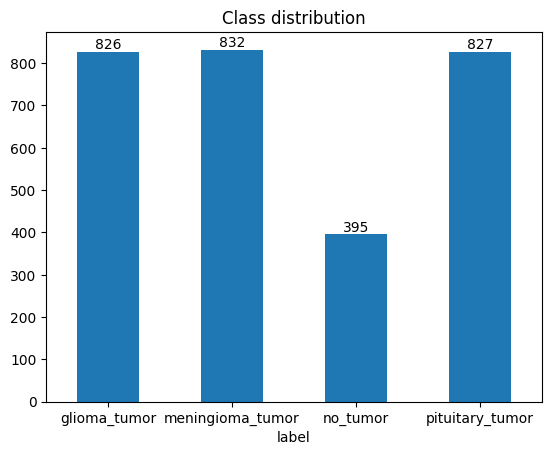

In [ ]:
# Define a dictionary to map the integer labels to their corresponding class names
label_mapping = {
     0:'glioma_tumor',
     1: 'meningioma_tumor',
    2: 'no_tumor',
     3:'pituitary_tumor',
}

# Create a pandas DataFrame from the list of integer labels
df = pd.DataFrame({"label":y_labels})

# Map the integer labels to their corresponding class names in the DataFrame
df['label'] = df['label'].map(label_mapping)

# Create a bar plot of the class distribution
ax = df['label'].value_counts().sort_index().plot(kind='bar')

# Add text labels to the bars indicating the number of samples in each class
for i, count in enumerate(df['label'].value_counts().sort_index()):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Rotate the x-axis labels for readability
plt.xticks(rotation = 0)

# Add a title to the plot
plt.title('Class distribution')

# Display the plot
plt.show()

In [ ]:

# Check if there are any corrupted images
if corrupted_images:
    # Print a message indicating that corrupted images were found
    print("Corrupted images found:")

    # Iterate through each corrupted image path
    for image_path in corrupted_images:
        # Print the path of the corrupted image
        print(image_path)
else:
    # Print a message indicating that no corrupted images were found
    print("No corrupted images found.")

No corrupted images found.


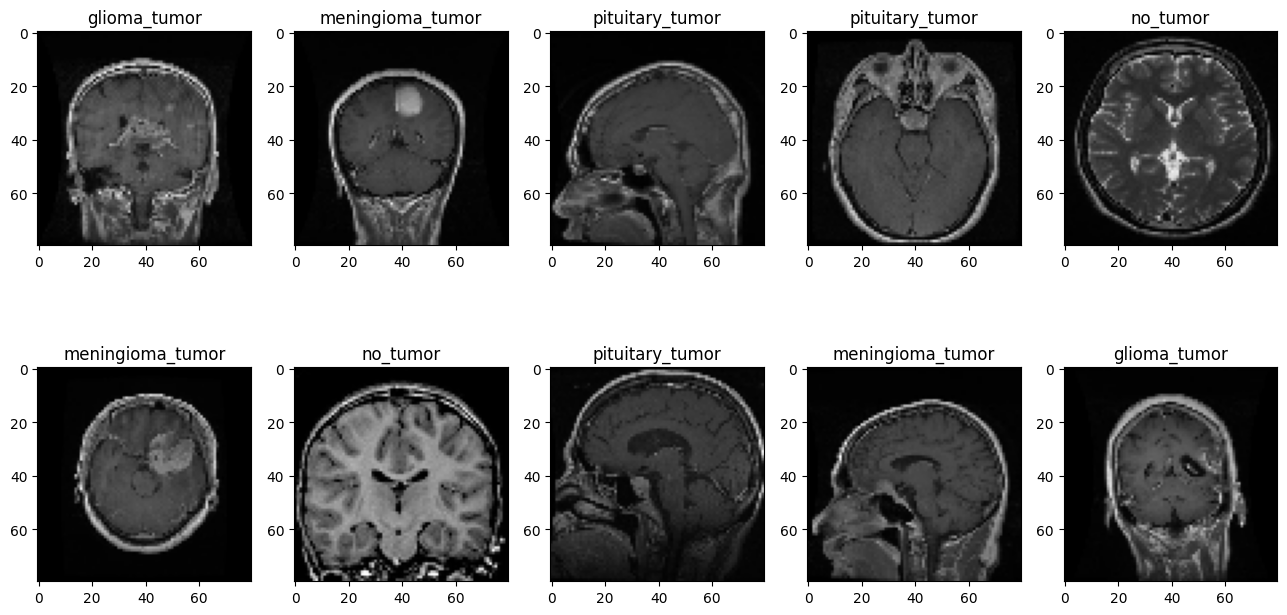

In [ ]:
# Create a figure with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))

# Iterate through each subplot
for i in range(2):
    for j in range(5):
        # Check if there are any corrupted images
        if corrupted_images:
            # If there are corrupted images, display the next corrupted image in the subplot
            image_path = corrupted_images.pop(0)
            axes[i, j].imshow(plt.imread(image_path))
            axes[i, j].set_title("Corrupted Image")
        else:
            # If there are no corrupted images, display a random image from the dataset in the subplot
            idx = np.random.randint(len(X_data))
            axes[i, j].imshow(X_data[idx].astype(np.uint8))
            axes[i, j].set_title(class_names[y_labels[idx]])

# Display the figure
plt.show()

In [ ]:
# Define the directory for each tumor dataset
giloma_tumor_directory = base_path+"/glioma_tumor"
no_tumor_directory =  base_path+"/no_tumor"
meningioma_tumor_directory = base_path + "/meningioma_tumor"
pituitary_tumor_directory =  base_path+"/pituitary_tumor"

In [ ]:
# Load the image and convert it to an array
image_path = os.path.join(pituitary_tumor_directory,'p (2).jpg')
img = load_img(image_path)
x = img_to_array(img)

# Reshape the array to have a batch size of 1
x = x.reshape((1,) + x.shape)

# Print the shape of the reshaped array
print('shape of image', x.shape)

shape of image (1, 512, 512, 3)


In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                             rotation_range=10,fill_mode='nearest')

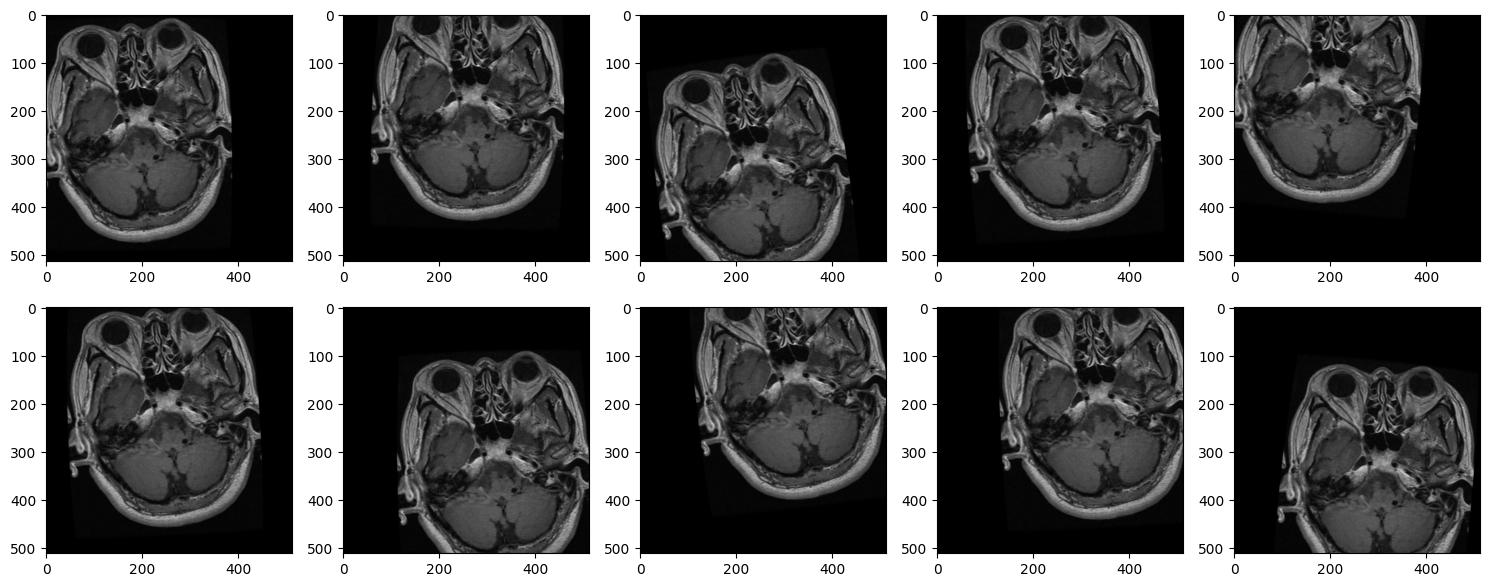

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    if i >= 10:
        break
    row = i // 5
    col = i % 5
    img_to_show = (batch[0]).astype('uint8')
    axes[row][col].imshow(img_to_show)

plt.tight_layout()
plt.show()


In [ ]:
# Initialize empty lists to store the image data and labels
image_data = []
image_labels = []

# Set the input dimension and image dimensions
input_dimension = 80
image_dimensions = (input_dimension, input_dimension)

# Loop over each class folder in the base path
for class_folder in os.listdir(base_path):


    class_folder_path = os.path.join(base_path, class_folder)
    for sub_folder in os.listdir(class_folder_path):
        sub_folder_path = os.path.join(class_folder_path, sub_folder)
        if os.path.isdir(sub_folder_path):
            for image_file in os.listdir(sub_folder_path):

                # Check if the image file has a .jpeg, .jpg, or .png extension
                if image_file.endswith((".jpeg", ".jpg", ".png")):

                    # Construct the image path
                    image_path = os.path.join(sub_folder_path, image_file)

                    # Read the image from the image path
                    image = cv2.imread(image_path)

                    # Resize the image to the specified image dimensions
                    image = cv2.resize(image, image_dimensions)
                    image_data.append(image)
                    image_labels.append(class_folder)
        else:

            # Check if the sub-folder path has a .jpeg, .jpg, or .png extension
            if sub_folder_path.endswith((".jpeg", ".jpg", ".png")):

                # Read the image from the sub-folder path
                image = cv2.imread(sub_folder_path)
                image = cv2.resize(image, image_dimensions)
                image_data.append(image)
                image_labels.append(class_folder)


In [ ]:
image_data = np.array(image_data) / 255
image_labels = np.array(image_labels)
print(f'image_data shape:{image_data.shape}')
print(f'image_labels shape:{image_labels.shape}')

image_data shape:(2880, 80, 80, 3)
image_labels shape:(2880,)


In [ ]:
# Load the image data and labels
imgs = image_data
labels = image_labels

# Set the number of augmentation rounds
augmentation_rounds = 40

# Define the image augmentation generator
augmentor = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                             rotation_range=10, fill_mode='nearest')


augmentor.fit(imgs)


augmented_images = []
augmented_labels = []

# Generate augmented images and labels using the augmentation generator
for image_batch, label_batch in augmentor.flow(imgs, labels, batch_size=32):
    augmented_images.append(image_batch)
    augmented_labels.append(label_batch)
    if len(augmented_images) >= augmentation_rounds:
        break

# Concatenate the original and augmented images and labels
images_data = np.concatenate((imgs, np.concatenate(augmented_images)))
labels = np.concatenate((labels, np.concatenate(augmented_labels)))

# Print the shapes of the combined images and labels
print(f"Combined images shape: {images_data.shape}")
print(f"Combined labels shape: {labels.shape}")

label_dataframe = pd.DataFrame({"label": labels})

# Print the label distribution
print("Label distribution:")
print(label_dataframe["label"].value_counts())

Combined images shape: (4160, 80, 80, 3)
Combined labels shape: (4160,)
Label distribution:
label
pituitary_tumor     1207
glioma_tumor        1201
meningioma_tumor    1192
no_tumor             560
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_data, labels, test_size=0.2, random_state=42)

In [ ]:
# Print the shapes of the training images and labels
print(f'X_train shape:{X_train.shape}')
print(f'labels shape:{labels.shape}')

# Create a DataFrame to display the training label distribution
df = pd.DataFrame({"label":labels})
print(df.value_counts())
print("")

# Print the shapes of the test images and labels
print(f'test_date shape:{X_test.shape}')
print(f'test_labels shape:{y_test.shape}')

df = pd.DataFrame({"test_labels":y_test})

# Print the test label distribution
print(df.value_counts())

X_train shape:(3328, 80, 80, 3)
labels shape:(4160,)
label           
pituitary_tumor     1207
glioma_tumor        1201
meningioma_tumor    1192
no_tumor             560
Name: count, dtype: int64

test_date shape:(832, 80, 80, 3)
test_labels shape:(832,)
test_labels     
pituitary_tumor     271
glioma_tumor        244
meningioma_tumor    207
no_tumor            110
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

y_train_one_hot = to_categorical(y_train, num_classes=4)

y_test = le.fit_transform(y_test)
y_test_one_hot = to_categorical(y_test, num_classes=4)

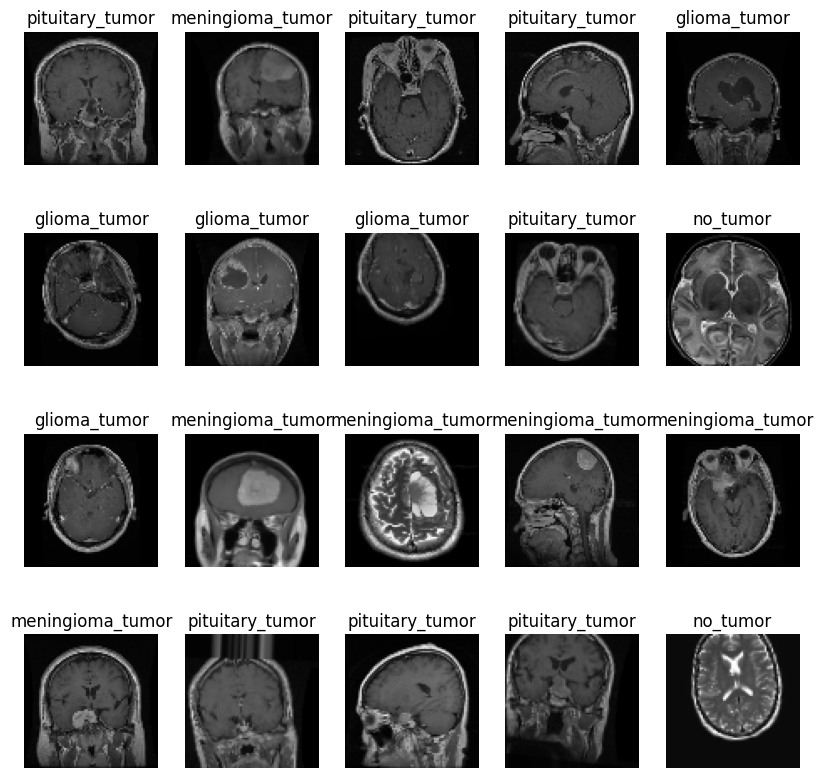

In [ ]:
import matplotlib.pyplot as plt

data = images_data

# Select 20 random indices to use as a sample
indices = np.random.randint(0, len(data), 20)

sample_images = data[indices]

fig = plt.figure(figsize=(10,10))

# Loop over the sample images
for i, img in enumerate(sample_images):
    # Create a new subplot for each image
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(labels[indices[i]])

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define parameters
num_classes = 4
input_size = 80

# Set random seed
tf.random.set_seed(42)
#baseline model

# Define model
model_fcn = Sequential([
    #layers.Rescaling(1./255, input_shape=(input_size, input_size, 3)),
    Conv2D(32, (3, 3), activation='relu', input_shape=(input_size, input_size, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer
])

In [ ]:
model_fcn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_fcn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 78, 78, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,152,420 (4.40 MB)

 Trainable params: 1,152,420 (4.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 20
history_fcn= model_fcn.fit(
    X_train,
     y_train_one_hot,
    batch_size=32,
    epochs=epochs ,
    validation_split=0.2
)
model_fcn.save_weights(f'epochs{epochs}_fcn.weights.h5') # Changed the filename to include .weights.h5

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.3920 - loss: 1.2688 - val_accuracy: 0.4745 - val_loss: 1.0340
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5114 - loss: 1.0052 - val_accuracy: 0.5946 - val_loss: 0.9191
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6317 - loss: 0.8472 - val_accuracy: 0.6652 - val_loss: 0.7655
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7167 - loss: 0.6645 - val_accuracy: 0.6937 - val_loss: 0.7149
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7725 - loss: 0.5566 - val_accuracy: 0.6502 - val_loss: 0.8309
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8148 - loss: 0.4656 - val_accuracy: 0.7042 - val_loss: 0.7728
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8423 - loss: 0.3750 - val_accuracy: 0.7372 - val_loss: 0.7498
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8512 - loss: 0.3849 - val_accuracy: 0.6907 - val_

## Baseline experimental results


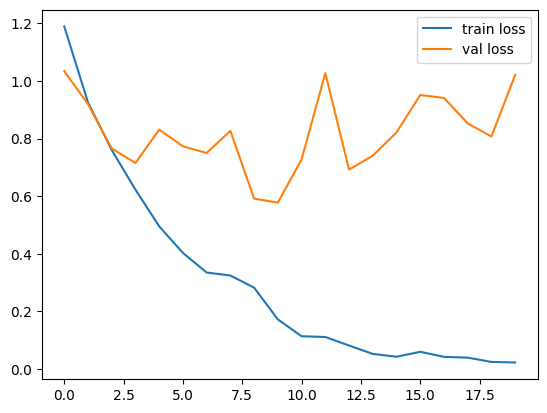

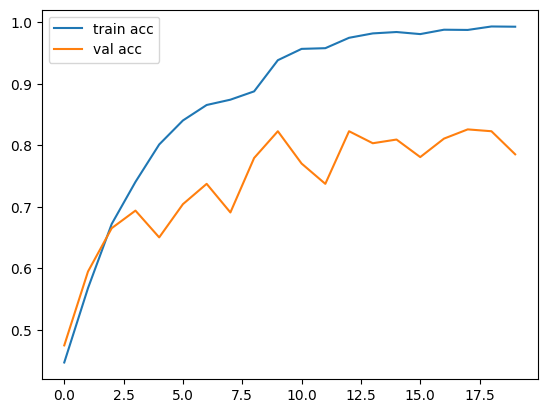

<Figure size 640x480 with 0 Axes>

In [ ]:

# Plot the training and validation loss
plt.plot(history_fcn.history['loss'], label='train loss')
plt.plot(history_fcn.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the training and validation accuracy
plt.plot(history_fcn.history['accuracy'], label='train acc')
plt.plot(history_fcn.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Get predicted probabilities for test set
y_pred = model_fcn.predict(X_test)

# Get predicted classes by taking argmax of predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)


print("Confusion matrix:")
confusion_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print(confusion_matrix)

print("\nClassification report:")
print(classification_report(y_true_classes, y_pred_classes))

print("\nAccuracy score:", accuracy_score(y_true_classes, y_pred_classes))
print("F1 score:", f1_score(y_true_classes, y_pred_classes, average='weighted'))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.8028846153846154
Confusion matrix:
[[219  20   1   4]
 [ 37 143   8  19]
 [  5  23  66  16]
 [ 13  14   4 240]]

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       244
           1       0.71      0.69      0.70       207
           2       0.84      0.60      0.70       110
           3       0.86      0.89      0.87       271

    accuracy                           0.80       832
   macro avg       0.80      0.77      0.78       832
weighted avg       0.80      0.80      0.80       832


Accuracy score: 0.8028846153846154
F1 score: 0.7994117181617182


<Axes: >

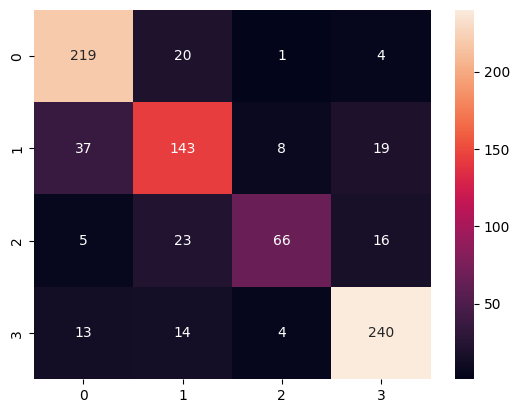

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, fmt='d')

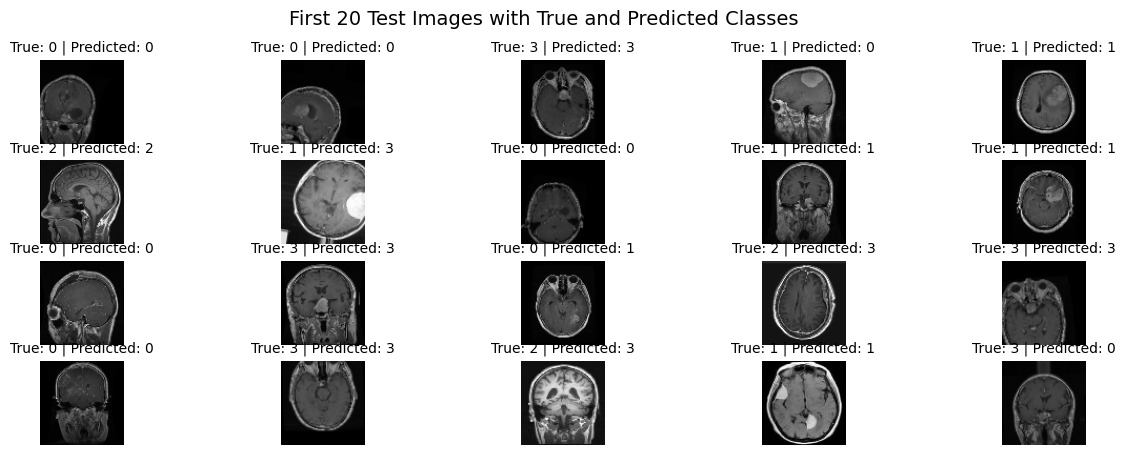

In [ ]:

num_images = 20


plt.figure(figsize=(15, 5))
# Loop through the first num_images in the test set
for i in range(num_images):
    plt.subplot(4, 5, i + 1)
    plt.imshow((X_test[i] * 255).astype(np.uint8))
    plt.axis('off')

    # Create a title for the subplot with the true and predicted classes
    title = f"True: {y_true_classes[i]} | Predicted: {y_pred_classes[i]}"
    plt.title(title, fontsize=10)

plt.suptitle("First 20 Test Images with True and Predicted Classes", fontsize=14)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Parameters
num_classes = 4
input_size = 80

# Set seed for reproducibility
tf.random.set_seed(42)

# Deeper model definition
model_deep = Sequential([
    # Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(input_size, input_size, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten and Dense layers
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])



In [ ]:
## sgd compiler
model_deep.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_deep.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 80, 80, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 80, 80, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 80, 80, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 80, 80, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 40, 40, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 40, 40, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 40, 40, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 40, 40, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 20, 20, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,89

 Total params: 3,599,268 (13.73 MB)

 Trainable params: 3,598,372 (13.73 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
epochs = 25
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model checkpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Fit the model with early stopping and checkpoint
history_cnn_deep_sgd = model_deep.fit(
    X_train, y_train_one_hot,
    epochs=epochs,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/25
82/84 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8680 - loss: 0.9614

84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8683 - loss: 0.9608 - val_accuracy: 0.8003 - val_loss: 1.2002
Epoch 2/25
82/84 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8837 - loss: 0.9347

84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8839 - loss: 0.9343 - val_accuracy: 0.7943 - val_loss: 1.1700
Epoch 3/25
82/84 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8777 - loss: 0.9330

84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8779 - loss: 0.9322 - val_accuracy: 0.8243 - val_loss: 1.0913
Epoch 4/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9000 - loss: 0.8938 - val_accuracy: 0.8198 - val_loss: 1.1478
Epoch 5/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9027 - loss: 0.8681 - val_accuracy: 0.7553 - val_loss: 1.3395
Epoch 6/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9021 - loss: 0.8684 - val_accuracy: 0.8423 - val_loss: 1.0920
Epoch 7/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9066 - loss: 0.8632 - val_accuracy: 0.8108 - val_loss: 1.1170
Epoch 8/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9167 - loss: 0.8491 - val_accuracy: 0.8213 - val_loss: 1.1291


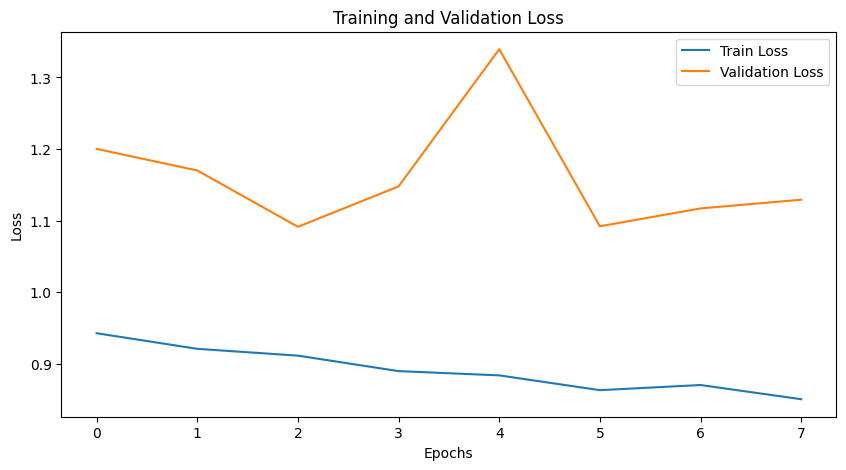

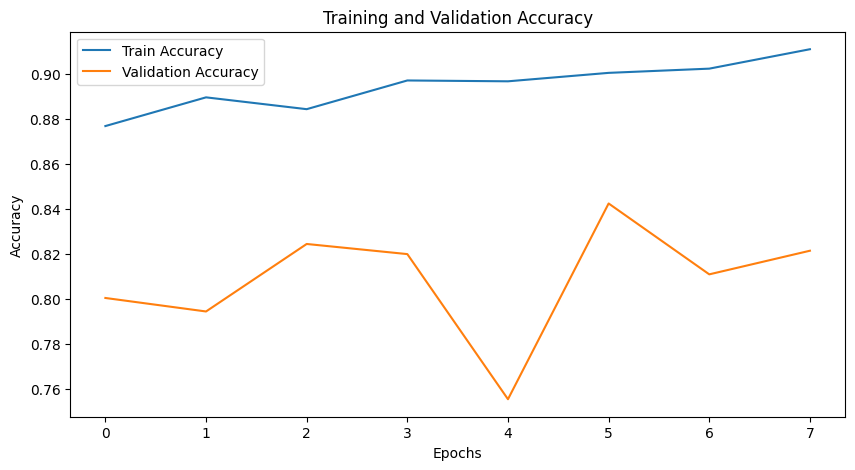

In [ ]:
# Plot the deeper model training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history_cnn_deep_sgd.history['loss'], label='Train Loss')
plt.plot(history_cnn_deep_sgd.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('train_validation_loss.png')
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_cnn_deep_sgd.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn_deep_sgd.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('train_validation_accuracy.png')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Generate predictions for the test dataset
y_pred = model_deep.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)

print("Confusion matrix:")
confusion_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print(confusion_matrix)

print("\nClassification report:")
print(classification_report(y_true_classes, y_pred_classes))

# Print the accuracy and F1-score
print("\nAccuracy score:", accuracy_score(y_true_classes, y_pred_classes))
print("F1 score:", f1_score(y_true_classes, y_pred_classes, average='weighted'))

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Accuracy: 0.8377403846153846
Confusion matrix:
[[210  28   0   6]
 [ 35 148  12  12]
 [  2  15  83  10]
 [  6   8   1 256]]

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       244
           1       0.74      0.71      0.73       207
           2       0.86      0.75      0.81       110
           3       0.90      0.94      0.92       271

    accuracy                           0.84       832
   macro avg       0.83      0.82      0.83       832
weighted avg       0.84      0.84      0.84       832


Accuracy score: 0.8377403846153846
F1 score: 0.8362473792774756


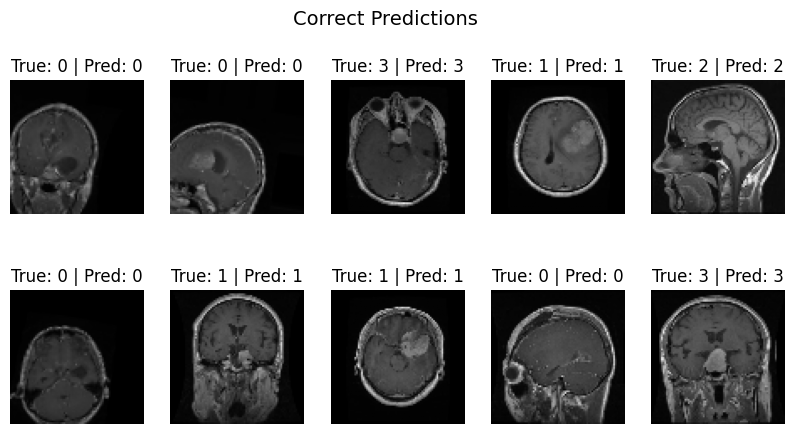

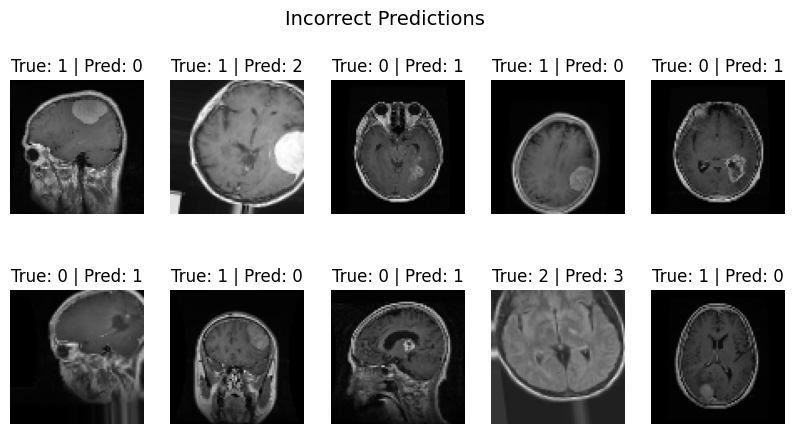

In [ ]:
correct_indices = np.where(y_true_classes == y_pred_classes)[0]
incorrect_indices = np.where(y_true_classes != y_pred_classes)[0]

# Visualize correct predictions
plt.figure(figsize=(10, 5))
for i, idx in enumerate(correct_indices[:10]):  # Show 10 correct predictions
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {y_true_classes[idx]} | Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.suptitle("Correct Predictions", fontsize=14)
plt.show()

# Visualize incorrect predictions
plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_indices[:10]):  # Show 10 incorrect predictions
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {y_true_classes[idx]} | Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.suptitle("Incorrect Predictions", fontsize=14)
plt.show()


In [ ]:
## adam compiler
model_deep.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_deep.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 80, 80, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 80, 80, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 80, 80, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 80, 80, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 40, 40, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 40, 40, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 40, 40, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 40, 40, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 20, 20, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,89

 Total params: 3,599,268 (13.73 MB)

 Trainable params: 3,598,372 (13.73 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
epochs = 25
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Model checkpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Fit the model with early stopping and checkpoint
history_cnn_deep_adam = model_deep.fit(
    X_train, y_train_one_hot,
    epochs=epochs,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.6476 - loss: 1.7303

84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.6474 - loss: 1.7294 - val_accuracy: 0.6351 - val_loss: 1.4945
Epoch 2/25
82/84 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6656 - loss: 1.3511

84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6661 - loss: 1.3498 - val_accuracy: 0.6997 - val_loss: 1.2740
Epoch 3/25
82/84 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7195 - loss: 1.1855

84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7201 - loss: 1.1835 - val_accuracy: 0.7598 - val_loss: 1.0774
Epoch 4/25
82/84 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7352 - loss: 1.1121

84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7359 - loss: 1.1106 - val_accuracy: 0.7598 - val_loss: 1.0453
Epoch 5/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7812 - loss: 0.9960 - val_accuracy: 0.7402 - val_loss: 1.0811
Epoch 6/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7816 - loss: 0.9647 - val_accuracy: 0.7553 - val_loss: 1.0952
Epoch 7/25
82/84 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8134 - loss: 0.8815

84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8134 - loss: 0.8815 - val_accuracy: 0.7538 - val_loss: 1.0197
Epoch 8/25
82/84 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8035 - loss: 0.8692

84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8040 - loss: 0.8685 - val_accuracy: 0.8093 - val_loss: 0.8735
Epoch 9/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8681 - loss: 0.7426 - val_accuracy: 0.8258 - val_loss: 0.9012
Epoch 10/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8641 - loss: 0.7426 - val_accuracy: 0.7733 - val_loss: 1.0229
Epoch 11/25
82/84 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8667 - loss: 0.7461

84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8667 - loss: 0.7459 - val_accuracy: 0.8153 - val_loss: 0.8470
Epoch 12/25
82/84 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8875 - loss: 0.6770

84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8874 - loss: 0.6769 - val_accuracy: 0.8408 - val_loss: 0.8182
Epoch 13/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8893 - loss: 0.6754 - val_accuracy: 0.8243 - val_loss: 0.8871
Epoch 14/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8925 - loss: 0.6428 - val_accuracy: 0.8003 - val_loss: 0.9849
Epoch 15/25
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9006 - loss: 0.6189

84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9006 - loss: 0.6187 - val_accuracy: 0.8468 - val_loss: 0.7756
Epoch 16/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9100 - loss: 0.5766 - val_accuracy: 0.7703 - val_loss: 1.0610
Epoch 17/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9184 - loss: 0.5799 - val_accuracy: 0.7883 - val_loss: 1.0312
Epoch 18/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9188 - loss: 0.5734 - val_accuracy: 0.7598 - val_loss: 1.2032


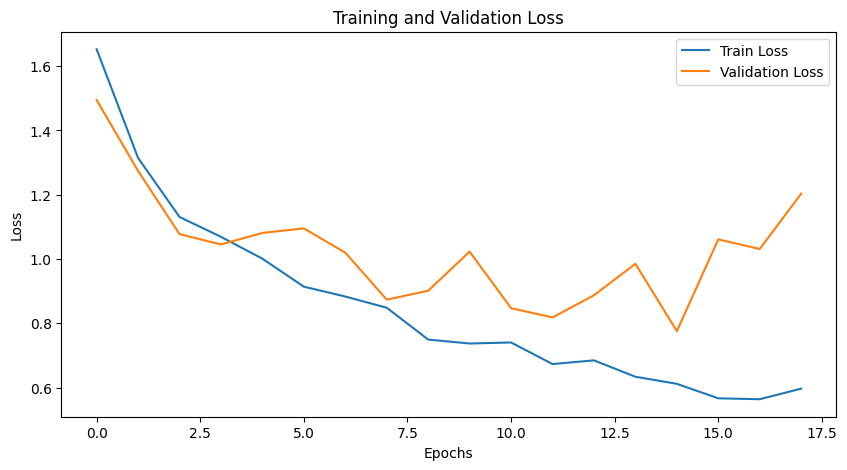

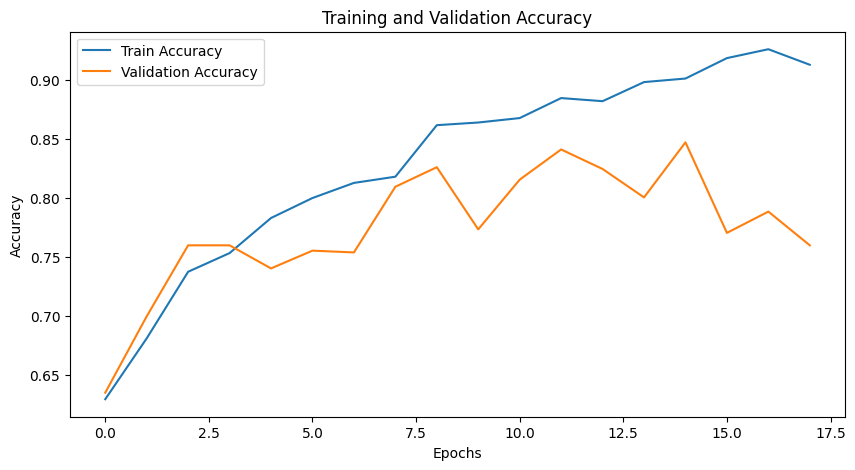

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history_cnn_deep_adam.history['loss'], label='Train Loss')
plt.plot(history_cnn_deep_adam.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('train_validation_loss.png')
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_cnn_deep_adam.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn_deep_adam.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('train_validation_accuracy.png')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Generate predictions for the test dataset
y_pred = model_deep.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)

print("Confusion matrix:")
confusion_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print(confusion_matrix)

print("\nClassification report:")
print(classification_report(y_true_classes, y_pred_classes))

# Print the accuracy and F1-score
print("\nAccuracy score:", accuracy_score(y_true_classes, y_pred_classes))
print("F1 score:", f1_score(y_true_classes, y_pred_classes, average='weighted'))

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Accuracy: 0.8461538461538461
Confusion matrix:
[[207  29   3   5]
 [ 21 163   8  15]
 [  2  17  82   9]
 [  6  11   2 252]]

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       244
           1       0.74      0.79      0.76       207
           2       0.86      0.75      0.80       110
           3       0.90      0.93      0.91       271

    accuracy                           0.85       832
   macro avg       0.84      0.83      0.83       832
weighted avg       0.85      0.85      0.85       832


Accuracy score: 0.8461538461538461
F1 score: 0.8460604006426574


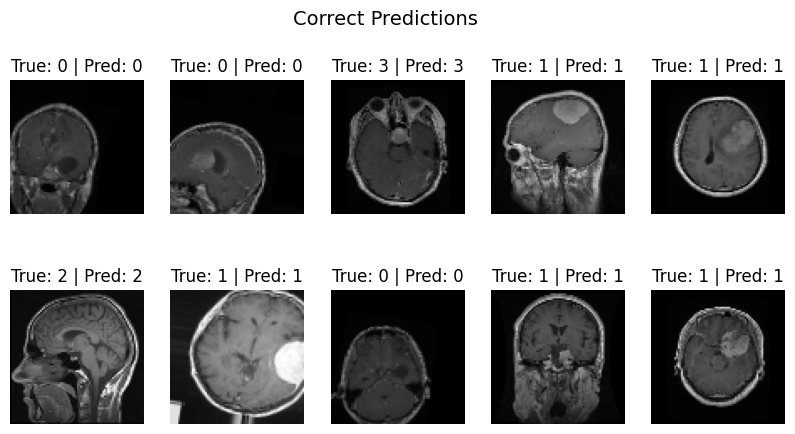

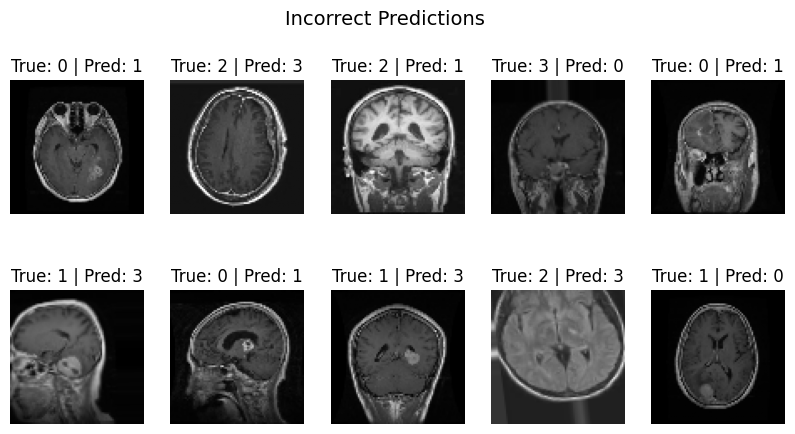

In [ ]:
correct_indices = np.where(y_true_classes == y_pred_classes)[0]
incorrect_indices = np.where(y_true_classes != y_pred_classes)[0]

# Visualize correct predictions
plt.figure(figsize=(10, 5))
for i, idx in enumerate(correct_indices[:10]):  # Show 10 correct predictions
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {y_true_classes[idx]} | Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.suptitle("Correct Predictions", fontsize=14)
plt.show()

# Visualize incorrect predictions
plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_indices[:10]):  # Show 10 incorrect predictions
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {y_true_classes[idx]} | Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.suptitle("Incorrect Predictions", fontsize=14)
plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf
tf.random.set_seed(666)


X_train = X_train
y_train = y_train_one_hot
input_shape = (input_size, input_size, 3)

base_model = MobileNetV2(include_top=False, input_shape=input_shape)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Freeze the weights of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add two Dense layers with relu and softmax activation functions, respectively
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(4, activation='softmax')(x)


# Create a new model using the input and output of the pre-trained model and the additional layers
transfer_learning_model = Model(inputs=base_model.input, outputs=x)

transfer_learning_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history_MobileNetV2 = transfer_learning_model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)
print("Test accuracy: ", max(history_MobileNetV2.history['val_accuracy']))

Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 18s 125ms/step - accuracy: 0.5794 - loss: 2.6128 - val_accuracy: 0.7297 - val_loss: 0.7438
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8131 - loss: 0.5023 - val_accuracy: 0.7598 - val_loss: 0.6479
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8724 - loss: 0.3396 - val_accuracy: 0.7733 - val_loss: 0.6223
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9113 - loss: 0.2386 - val_accuracy: 0.8078 - val_loss: 0.5750
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9269 - loss: 0.1937 - val_accuracy: 0.8213 - val_loss: 0.5725
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9358 - loss: 0.1902 - val_accuracy: 0.7703 - val_loss: 0.7300
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9431 - loss: 0.1697 - val_accuracy: 0.7538 - val_loss: 0.8372
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9422 - loss: 0.1588 - val_accuracy: 0.7898 -

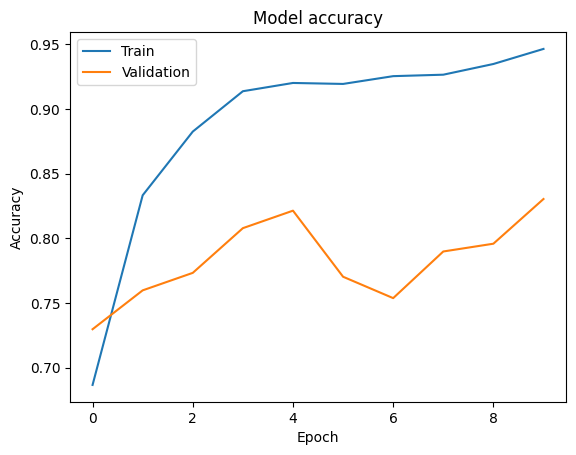

In [ ]:

# Plot the training and validation accuracy of the model
plt.plot(history_MobileNetV2.history['accuracy'])
plt.plot(history_MobileNetV2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

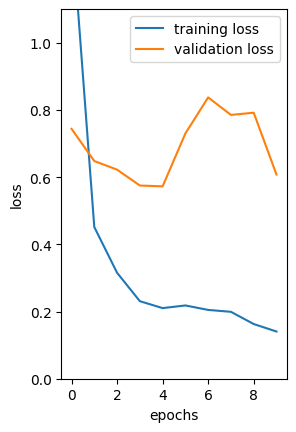

In [ ]:
# Plot the training and validation loss of the MobileNetV2 model
plt.subplot(1,2,1)
plt.plot(history_MobileNetV2.history['loss'], label='training loss')
plt.plot(history_MobileNetV2.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.ylim(0,1.1)
plt.show()

In [ ]:

loss, accuracy = transfer_learning_model.evaluate(X_test, y_test_one_hot, verbose=0)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

Test loss: 0.5793882012367249
Test accuracy: 0.8425480723381042


In [ ]:
# Make predictions on the test dataset using the transfer learning model
y_pred = transfer_learning_model.predict(X_test)

# Extract predicted class labels from predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Accuracy: 0.8425480769230769


In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Calculate and print confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

print("\nClassification report:")
print(classification_report(y_test_classes, y_pred_classes))

print("\nAccuracy score:", accuracy_score(y_test_classes, y_pred_classes))
print("F1 score:", f1_score(y_test_classes, y_pred_classes, average='weighted'))

Confusion matrix:
[[197  35   4   8]
 [ 23 156   5  23]
 [  4   5  92   9]
 [  3  10   2 256]]

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       244
           1       0.76      0.75      0.76       207
           2       0.89      0.84      0.86       110
           3       0.86      0.94      0.90       271

    accuracy                           0.84       832
   macro avg       0.85      0.84      0.84       832
weighted avg       0.84      0.84      0.84       832


Accuracy score: 0.8425480769230769
F1 score: 0.8416155331637393


In [ ]:
# Extract the validation accuracy of the last epoch for each model
val_acc_fcn = history_fcn.history['val_accuracy'][-1]
val_acc_cnn_deep_sgd = history_cnn_deep_sgd.history['val_accuracy'][-1]
val_acc_cnn_deep_adam = history_cnn_deep_adam.history['val_accuracy'][-1]
val_acc_MobileNetV2 = history_MobileNetV2.history['val_accuracy'][-1]

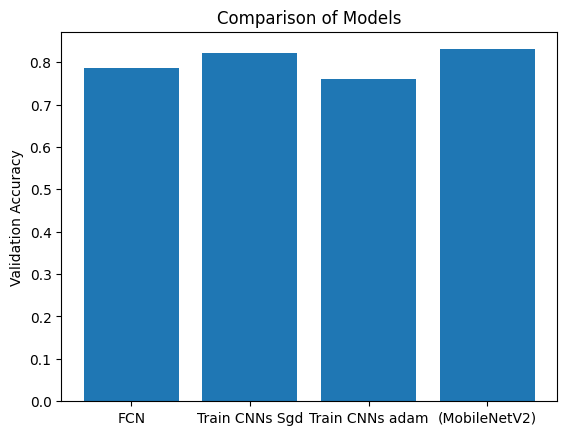

In [ ]:
# Create a bar chart to compare the validation accuracy of different models
fig, ax = plt.subplots()
models = ['FCN','Train CNNs Sgd','Train CNNs adam', '(MobileNetV2)']
val_accs = [val_acc_fcn,val_acc_cnn_deep_sgd,val_acc_cnn_deep_adam, val_acc_MobileNetV2]
ax.bar(models, val_accs)
ax.set_ylabel('Validation Accuracy')
ax.set_title('Comparison of Models')
plt.show()
